# Lab 3

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.python.ops.numpy_ops.np_config as np_config
np_config.enable_numpy_behavior()

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# TFDS da las imágenes como tf.uint8, pero que el modelo espera tf.float32.
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [3]:
print(ds_train)

<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


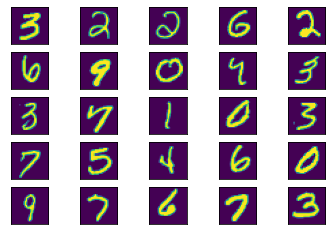

In [4]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(list(ds_train)[0][0][i].reshape(28,28))
plt.show()

In [5]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

## Aqui mero se pone alegre

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(28,(1,1), activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10),
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        56        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5488)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               702592    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 703,938
Trainable params: 703,938
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

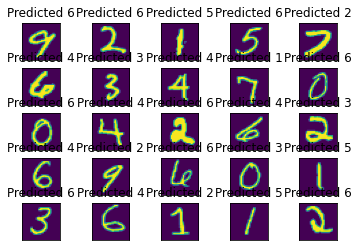

In [10]:
for (index, (img, label)) in enumerate(ds_train):
  if (index<25):
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[0].reshape(28,28))
    pred = np.argmax(model.predict(img)[0])
    plt.title('Predicted {}'.format(pred))
  else:
    break
plt.show()

In [13]:
history = model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 22s 48ms/step - loss: 0.0674 - sparse_categorical_accuracy: 0.9781 - val_loss: 0.1002 - val_sparse_categorical_accuracy: 0.9708
Epoch 2/6
469/469 [==============================] - 22s 47ms/step - loss: 0.0597 - sparse_categorical_accuracy: 0.9803 - val_loss: 0.1034 - val_sparse_categorical_accuracy: 0.9675
Epoch 3/6
469/469 [==============================] - 23s 48ms/step - loss: 0.0538 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.1072 - val_sparse_categorical_accuracy: 0.9673
Epoch 4/6
469/469 [==============================] - 22s 48ms/step - loss: 0.0503 - sparse_categorical_accuracy: 0.9830 - val_loss: 0.0929 - val_sparse_categorical_accuracy: 0.9722
Epoch 5/6
469/469 [==============================] - 22s 47ms/step - loss: 0.0452 - sparse_categorical_accuracy: 0.9849 - val_loss: 0.0988 - val_sparse_categorical_accuracy: 0.9719
Epoch 6/6
469/469 [==============================] - 23s 49ms/step - loss: 0.0417 - sparse_cate

In [15]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


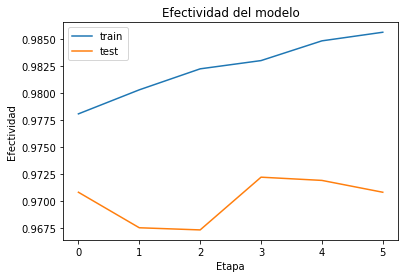

In [16]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Efectividad del modelo')
plt.ylabel('Efectividad')
plt.xlabel('Etapa')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



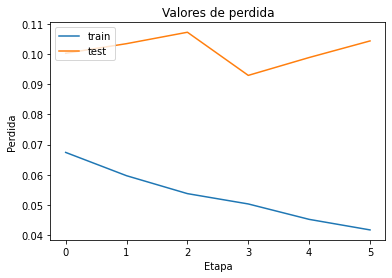

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Valores de perdida')
plt.ylabel('Perdida')
plt.xlabel('Etapa')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

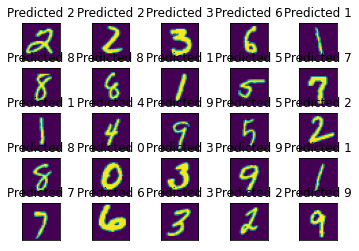

In [12]:
for (index, (img, label)) in enumerate(ds_test):
  if (index<25):
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[0].reshape(28,28))
    pred = np.argmax(model.predict(img)[0])
    plt.title('Predicted {}'.format(pred))
  else:
    break
plt.show()